# このスクリプトは金額をシュミレーションするものである

# モジュールインポート

In [1]:
# scikitlearnのアルゴリズムのロード
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier 

# scikit learnの精度測定ツールの読み込み
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pandas(pd) とNumpy(np)のモジュール
import numpy as np
import pandas as pd
import sys,os,random
import warnings
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

# 前処理済みファイルのロード

In [2]:
# データフレームの表示件数の設定
pd.set_option('display.max_columns', 100)

# データロード
df = pd.read_pickle("data/df_test.pkl")

loc_result=df.columns.get_loc('result')
loc_Date  =df.columns.get_loc('Date')
loc_open  =df.columns.get_loc('Open')
loc_close =df.columns.get_loc('Close')
display(df.tail(3))

,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result
4929,2020-10-28,23372.609375,23418.509766,0.993201,-0.018615,-0.629953,-0.789948,-0.650273,-1.028604,-0.912587,-0.726649,-0.450589,-0.746715,-0.734958,-1.247643,-0.916246,-1.439032,-0.568912,0.430381,-0.202651,0.508853,0.334017,0.809490,-0.452493,-0.161853,-0.082727,0.668808,0.678912,0.545123,0.220486,-0.187942,-0.224634,-0.282526,-0.249884,1.116083,0.772367,1.766538,0.981353,1.047495,-0.645629,0.479425,1.225565,0.974067,0.603938,0.264125,0.496876,0.558751,2.005002,1.519582,1.604225,1.629189,1.189761,0.789707,0.208753,1.077914,2.748309,3.852833,4.184895,4.009034,3.971974,4.436464,6.492877,4.962457,3.927963,3.676024,2.804439,3.896969,2.548551,2.559212,2.637174,2.477419,2.028327,2.430982,3.272996,3.456114,3.717061,4.145335,3.963239,3.190782,4.965661,5.364229,4.630203,4.645199,5.021595,4.228615,4.866954,3.689274,3.253874,4.558173,3.805600,4.510525,3.799189,6.664390,5.589902,0
4930,2020-10-29,23170.759766,23331.939453,0.978519,-0.863616,-0.882070,-1.488129,-1.646742,-1.508273,-1.883337,-1.768322,-1.583990,-1.310313,-1.603882,-1.592227,-2.100485,-1.771949,-2.290220,-1.427615,-0.436952,-1.064517,-0.359158,-0.532484,-0.061117,-1.312202,-1.024071,-0.945629,-0.200584,-0.190567,-0.323201,-0.645034,-1.049935,-1.086310,-1.143702,-1.111342,0.242828,-0.097920,0.887665,0.109261,0.174833,-1.503669,-0.388331,0.351365,0.102039,-0.264894,-0.601772,-0.371032,-0.309690,1.124071,0.642842,0.726755,0.751503,0.315870,-0.080729,-0.656666,0.204989,1.860958,2.955943,3.285137,3.110795,3.074055,3.534534,5.573187,4.055984,3.030425,2.780661,1.916604,2.999698,1.662925,1.673494,1.750783,1.592407,1.147194,1.546371,2.381114,2.562651,2.821344,3.245919,3.065396,2.299610,4.059160,4.454286,3.726599,3.741466,4.114612,3.328480,3.961306,2.793797,2.362157,3.655192,2.909118,3.607956,2.902763,5.743219,0
4931,2020-10-30,23320.710938,22977.130859,1.006727,0.647157,-0.222048,-0.240622,-0.850603,-1.010242,-0.870877,-1.248368,-1.132608,-0.947084,-0.671636,-0.967105,-0.955374,-1.466921,-1.136259,-1.657885,-0.789697,0.207377,-0.424249,0.285675,0.111227,0.585644,-0.673537,-0.383542,-0.304592,0.445275,0.455356,0.321865,-0.002052,-0.409573,-0.446184,-0.503946,-0.471378,0.891557,0.548604,1.540567,0.757125,0.823121,-0.866243,0.256313,1.000796,0.749856,0.380548,0.041491,0.273724,0.335463,1.778502,1.294159,1.378615,1.403523,0.965071,0.565905,-0.013758,0.853473,2.520158,3.622229,3.953554,3.778083,3.741106,4.204565,6.256411,4.729390,3.697193,3.445813,2.576164,3.666268,2.320844,2.331481,2.409270,2.249870,1.801775,2.203536,3.043681,3.226392,3.486760,3.914082,3.732391,2.961649,4.732586,5.130269,4.397873,4.412836,4.788397,3.997177,4.634098,3.459034,3.024600,4.326004,3.575102,4.278462,3.568705,0


In [3]:
#トレーニングデータと正解ラベルに分割
testX=df.iloc[:,loc_open:loc_result].as_matrix()

# 正解データ
testY=df.iloc[:,loc_result].as_matrix()
#データサンプル数の確認
print("　 　 テストデータ",testX.shape,"　 　 テストデータ",testY.shape)

　 　 テストデータ (969, 93) 　 　 テストデータ (969,)


# sckit-learnの準備


In [4]:
# 保存したモデルをロードする
filename = 'model/sk-learn_model.sav'
classifier = pickle.load(open(filename, 'rb'))
display(classifier)
#　分類器の正答率を求める
pre=classifier.predict(testX)
ac_score=accuracy_score(testY,pre)
print("精度：{:.2%}".format(ac_score))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

精度：62.64%


In [5]:
#np.argmax(classifier.predict_proba(testX),axis=1)

In [6]:
#予測計算
df['predict']=np.argmax(classifier.predict_proba(testX),axis=1)
# ０は買い、１は売りに変換
df['predict']=df['predict'].apply(lambda x: "買" if x==0  else "売")
df['result2']=((df['result']-1)*100).round(2)
def check_asnswer(row):
    if row['predict']=="売" and row['result2']<=0:
        return "○"
    if row['predict']=="売" and row['result2']>0:
        return "×"
    if row['predict']=="買" and row['result2']>=0:
        return "○"
    if row['predict']=="買" and row['result2']<0:
        return "×"
    return "-"
df['正誤'] = df.apply(check_asnswer, axis=1)
df['正誤'].value_counts()

○    576
×    393
Name: 正誤, dtype: int64

# シミュレーション

In [7]:
df_num=df.as_matrix()   #numpyへ変換
close_index=df.columns.get_loc('Close')
open_index= df.columns.get_loc('Open')
date_index= df.columns.get_loc('Date')

MONEY=1000000
LEN=len(df_num)

start=len(df_num)-len(testX)
end=len(df_num)-1
print("start:",df_num[start,0],"〜end:",df_num[end,0])

standard=1000000/df_num[start,1]  
DATE=df['Date'].values[0]
result_out=""


start: 2016-09-28 00:00:00 〜end: 2020-10-30 00:00:00


In [8]:
threshold=0.55
def judgment(PRE2):
    arg=np.argmax(PRE2,axis=0)
    if PRE2[arg]>threshold:
        arg=np.argmax(PRE2,axis=0)
        #print("確率:", PRE2[arg],end=" ")

    else:
        arg=2

    return arg

In [9]:
df

,Date,Open,Close,dow_compare,day+1,day+2,day+3,day+4,day+5,day+6,day+7,day+8,day+9,day+10,day+11,day+12,day+13,day+14,day+15,day+16,day+17,day+18,day+19,day+20,day+21,day+22,day+23,day+24,day+25,day+26,day+27,day+28,day+29,day+30,day+31,day+32,day+33,day+34,day+35,day+36,day+37,day+38,day+39,day+40,day+41,day+42,day+43,day+44,day+45,day+46,day+47,day+48,day+49,day+50,day+51,day+52,day+53,day+54,day+55,day+56,day+57,day+58,day+59,day+60,day+61,day+62,day+63,day+64,day+65,day+66,day+67,day+68,day+69,day+70,day+71,day+72,day+73,day+74,day+75,day+76,day+77,day+78,day+79,day+80,day+81,day+82,day+83,day+84,day+85,day+86,day+87,day+88,day+89,day+90,result,predict,result2,正誤
3963,2016-09-28,16504.990234,16465.400391,1.007132,0.695996,-1.211789,-1.520597,0.201196,0.620424,0.281006,-0.044995,-0.764008,-1.548855,-1.453092,-2.879653,-2.820359,-2.552878,-3.657173,-2.359171,-2.251503,-2.093032,-1.114316,-0.758041,0.117918,-0.453314,-0.273233,-0.270880,-0.567914,-0.322439,-0.870395,-0.549940,-2.213860,-2.145626,-2.205282,-1.162279,-0.766094,0.259388,1.388292,2.082158,1.711377,0.214397,0.546317,0.888224,-0.549285,-0.127497,-0.186385,-0.905512,-0.649556,-2.077637,-0.852588,-0.644709,0.664005,1.617946,0.991190,3.406304,7.342964,7.686845,7.546719,6.935975,6.113847,5.140589,4.775561,6.323639,9.342878,8.921686,1.047640,2.524317,2.542156,3.963141,4.204357,5.586054,3.993206,4.468111,3.148515,1.139032,-0.796511,-1.415832,-1.300644,-0.877185,0.804174,-0.569412,-1.856840,-3.463899,-2.761507,-1.934047,-2.497088,-1.547089,-0.602521,-0.997458,-0.542332,-1.799622,-0.640585,-0.685717,0.689793,0,買,-100,×
3964,2016-09-29,16606.300781,16693.710938,1.005429,0.613818,1.314086,-0.605409,-0.916113,0.816248,1.238050,0.896548,0.568547,-0.154880,-0.944545,-0.848194,-2.283511,-2.223853,-1.954730,-3.065804,-1.759834,-1.651506,-1.492062,-0.507338,-0.148877,0.732460,0.157721,0.338907,0.341275,0.042418,0.289400,-0.261920,0.060502,-1.613631,-1.544979,-1.605001,-0.555595,-0.156979,0.874798,2.010632,2.708756,2.335700,0.829531,1.163488,1.507493,0.061161,0.485538,0.426288,-0.297252,-0.039726,-1.476572,-0.244004,-0.034848,1.281899,2.241695,1.611092,4.041030,8.001854,8.347846,8.206860,7.592367,6.765192,5.785961,5.418692,6.976273,10.014043,9.590266,1.667888,3.153629,3.171578,4.601285,4.843982,6.234160,4.631535,5.109354,3.781658,1.759841,-0.187582,-0.810705,-0.694810,-0.268752,1.422927,0.040911,-1.254419,-2.871343,-2.164640,-1.332101,-1.898597,-0.942767,0.007598,-0.389763,0.068156,-1.196850,-0.030699,-0.076109,0,買,-100,×
3965,2016-09-30,16474.449219,16449.839844,0.990207,-0.793985,-0.185041,0.509667,-1.394588,-1.702824,0.015782,0.434235,0.095445,-0.229952,-0.947636,-1.731030,-1.635445,-3.059366,-3.000181,-2.733195,-3.835447,-2.539847,-2.432378,-2.274201,-1.297295,-0.941680,-0.067341,-0.637516,-0.457769,-0.455419,-0.751904,-0.506883,-1.053825,-0.733964,-2.394805,-2.326697,-2.386243,-1.345169,-0.949718,0.073867,1.200682,1.893264,1.523169,0.028959,0.360265,0.701539,-0.733310,-0.312303,-0.371081,-1.088877,-0.833396,-2.258834,-1.036052,-0.828557,0.477735,1.429911,0.804315,3.214960,7.144336,7.487580,7.347714,6.738099,5.917493,4.946036,4.581683,6.126897,9.140548,8.720136,0.860660,2.334604,2.352411,3.770766,4.011536,5.390676,3.800776,4.274802,2.957647,0.951883,-0.980078,-1.598254,-1.483278,-1.060603,0.617644,-0.753399,-2.038445,-3.642531,-2.941438,-2.115509,-2.677508,-1.729267,-0.786447,-1.180654,-0.726370,-1.981333,-0.824441,0,買,-100,×
3966,2016-10-03,16566.029297,16598.669922,1.006949,0.555892,-0.242507,0.369822,1.068392,-0.846448,-1.156399,0.571761,0.992540,0.651867,0.324661,-0.397012,-1.184761,-1.088644,-2.520481,-2.460967,-2.192497,-3.300876,-1.998074,-1.890008,-1.730951,-0.748615,-0.391023,0.488176,-0.085169,0.095578,0.097941,-0.200192,0.046191,-0.503792,-0.182152,-1.852226,-1.783739,-1.843616,-0.796755,-0.399105,0.630169,1.763249,2.459680,2.087528,0.585012,0.918160,1.261330,-0.181494,0.241853,0.182747,-0.539039,-0.282137,-1.715499,-0.485919,-0.277271,1.036283,1.993751,1.364678,3.78

In [10]:
df_sim = pd.DataFrame( )
MONEY=1000000
DATE=""
for i,row in df.iterrows(): 

    profit_rate=0
    DATE2=str(row['Date'])
    if DATE != DATE2[:7]:       #月初の定点観測
        DATE=DATE2[:7]
        #print(DATE,DATE2    )
        print()
        result_out=result_out+"\n"
        if DATE2[5:7]=="01":
            print("-"*80)
            result_out=result_out+"-"*80+"\n"
        STRING=DATE2[:7]+":金"+"{:,}".format(int(MONEY))+"(基"+"{:,}".format(int(standard*row["Open"])).strip()+")"
        print(STRING.strip(),end="")
        result_out=result_out+STRING.strip()+"\n"

        
    PREDICT    ="None"
    profit_rate=row['Close']/row['Open']
    print("{}{}".format(row["predict"],row["正誤"]),end=",")

    #  買い予測の場合(1)
    if row["predict"]=="買":
        MONEY=MONEY*profit_rate

    #  売り予測の場合(0)
    if row["predict"]=="売":
        MONEY=MONEY/profit_rate

    Y_result="None"
    if row['result']==1:    
        Y_result="buy"
    elif row['result']==0:
        Y_result="sell"

    if profit_rate!=0:
        profit_rate=100*(profit_rate-1)
    df_sim=df_sim.append(
             {"Date":row['Date'],
        'Open':round(row['Open'], 2),    
        'Close':round(row['Close'],2),   
        'Up':round(profit_rate*100,2), 
        'money':round(MONEY),
        '基準価格':int(standard*row['Open']),   
        'result':Y_result,
        'predict':row["predict"],
        '正誤':row['正誤'],
        '利益率':round(profit_rate,2)}
        ,ignore_index=True)


2016-09:金1,000,000(基1,000,000)買×,買×,買×,
2016-10:金1,001,354(基1,003,698)買×,買×,買×,買○,売○,買○,売○,売○,買×,買×,買×,買×,買×,売○,買×,買×,買×,買×,買○,買○,
2016-11:金1,075,251(基1,053,047)買○,売○,買×,買○,売○,売○,買×,売○,買×,買×,買×,買×,売○,買×,買×,買×,買×,買×,売○,
2016-12:金1,269,381(基1,123,008)売○,買○,売○,売○,買×,買×,買×,売○,買×,買×,売○,買×,買×,買×,売○,買○,買○,買○,売○,買×,
--------------------------------------------------------------------------------
2017-01:金1,355,183(基1,169,263)買×,売○,買○,売○,買○,売○,買○,売○,買×,買○,買×,売○,買×,買×,買○,買○,買○,売○,
2017-02:金1,458,019(基1,146,742)買×,売○,売○,売○,買×,買×,買×,買×,買○,売○,買○,売○,買×,買×,買○,買○,買○,買×,売○,
2017-03:金1,560,718(基1,164,916)買×,売○,売○,買○,買×,売○,買×,買×,買○,買○,買○,買○,買○,買○,売○,買×,買×,買×,買×,買○,売○,売○,
2017-04:金1,686,933(基1,150,439)買○,売○,買○,売○,売○,買○,買○,買○,買○,売○,売○,買×,買×,買×,買×,買×,買○,買×,売○,
2017-05:金1,787,969(基1,160,499)買×,買×,買×,売○,買○,買×,売○,買○,売○,買○,買×,買×,買×,買×,売○,買○,売○,買×,買×,
2017-06:金1,877,917(基1,193,103)買×,買○,買○,売○,買○,売○,買×,売○,買×,売○,買×,買×,買×,買○,売○,売○,買○,買×,買○,買○,買○,買×,
2017-07:金1,982,989(基1,215,167)買○,売○,売○,買×,買×,買×,買○,売○,買○,売○,買×,買○

In [11]:
df_sim[(
    df_sim['Date'].astype(str).str.contains('01-04') |
    df_sim['Date'].astype(str).str.contains('04-01') |
    df_sim['Date'].astype(str).str.contains('07-01') |
    df_sim['Date'].astype(str).str.contains('10-01') 
)]

,Close,Date,Open,Up,money,predict,result,利益率,基準価格,正誤
62,19594.16,2017-01-04,19298.68,153.11,1375933.0,買,sell,1.53,1169263.0,×
302,23506.33,2018-01-04,23073.73,187.49,2950204.0,買,sell,1.87,1397985.0,×
480,24245.76,2018-10-01,24173.37,29.95,7176953.0,買,sell,0.30,1464609.0,×
540,19561.96,2019-01-04,19655.13,-47.40,11851878.0,売,sell,-0.47,1190859.0,○
596,21509.03,2019-04-01,21500.89,3.79,15591593.0,買,sell,0.04,1302690.0,×
653,21729.97,2019-07-01,21566.27,75.91,19156683.0,買,sell,0.76,1306651.0,×
713,21885.24,2019-10-01,21831.44,24.64,23446391.0,買,buy,0.25,1322717.0,○
829,18065.41,2020-04-01,18686.12,-332.18,55213958.0,売,buy,-3.32,1132149.0,○
888,22121.73,2020-07-01,22338.30,-96.95,82820274.0,売,sell,-0.97,1353427.0,○
947,23184.93,2020-10-01,23184.93,0.00,105753587.0,買,sell,0.00,1404722.0,×


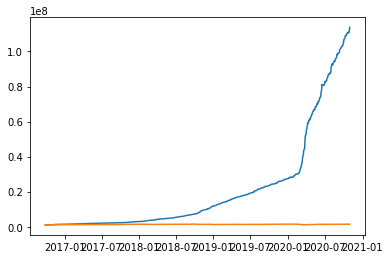

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#df_sim.plot(x='Date',y='money',title='Money/Date')

plt.plot(df_sim['Date'],df_sim['money'])
plt.plot(df_sim['Date'],df_sim['基準価格'])
plt.show()

In [13]:
print("●",df_sim[df_sim['正誤']=="●"].shape[0],"回 勝ち")
print("X",df_sim[df_sim['正誤']=="×"].shape[0],"回 負け")

df_year=pd.DataFrame()
for i in range(7,21):
    YEAR=str(i+2000)
    start_day=YEAR+"-01-01"
    end_day=YEAR+"-12-31"

    tmp=df_sim.query("Date >= @start_day and Date <= @end_day ")
    
    if tmp.shape[0]==0:
        continue
    year_start=tmp['money'].head(1).values[0]
    year_end  =tmp['money'].tail(1).values[0]

    win_rate  =tmp[tmp["正誤"]=="○"].shape[0]/tmp.shape[0]
    df_year=df_year.append(
    {
    "年":YEAR,
    "利益率" :str(round( year_end/year_start*100,1))+"%",
    "年初値" :int(year_start),
     "年末値":int( year_end),
     "勝率"  :str(round(win_rate*100,1))+"%"
        },ignore_index=True)
df_year[["年","勝率",    "年初値","年末値","利益率" ]]

● 0 回 勝ち
X 393 回 負け


,年,勝率,年初値,年末値,利益率
0,2016,43.5%,997601.0,1355184.0,135.8%
1,2017,54.6%,1375933.0,2895910.0,210.5%
2,2018,63.4%,2950204.0,11795698.0,399.8%
3,2019,57.9%,11851878.0,27454659.0,231.6%
4,2020,67.3%,27590603.0,113839239.0,412.6%


In [14]:
df_sim.tail(30)

,Close,Date,Open,Up,money,predict,result,利益率,基準価格,正誤
939,23319.37,2020-09-17,23416.62,-41.53,102207201.0,売,buy,-0.42,1418759.0,○
940,23360.30,2020-09-18,23321.19,16.77,102378610.0,買,buy,0.17,1412978.0,○
941,23346.49,2020-09-23,23245.89,43.28,102821666.0,買,sell,0.43,1408415.0,×
942,23087.82,2020-09-24,23215.00,-54.78,103388061.0,売,sell,-0.55,1406544.0,○
943,23204.62,2020-09-25,23217.33,-5.47,103331459.0,買,sell,-0.05,1406685.0,×
944,23511.62,2020-09-28,23391.96,51.15,103860036.0,買,buy,0.51,1417265.0,○
945,23539.10,2020-09-29,23410.50,54.93,104430565.0,買,buy,0.55,1418389.0,○
946,23185.12,2020-09-30,23478.85,-125.10,105753587.0,売,buy,-1.25,1422530.0,○
947,23184.93,2020-10-01,23184.93,0.00,105753587.0,買,sell,0.00,1404722.0,×
948,23029.90,2020-10-02,23294.80,-113.72,106970013.0,売,buy,-1.14,1411379.0,○
